In [2]:
import pandas as pd

In [3]:
features = pd.read_csv("~/depot/tdm-musafe/data/features.csv") # Import features set

In [4]:
df_raw = pd.read_csv('~/depot/tdm-musafe/data/human-activity-recognition/raw-data/har_raw.gz') # import raw data to get incident classification

In [5]:
# remove unimportant accelerometer data (we just need one datapoint from each incident to get the motion for it)
df = df_raw.drop_duplicates(subset="incident_id").reset_index().drop("index", axis=1) 

In [6]:
df.head()

,hash_id,incident_id,motion,sample_number,milliseconds,seconds,x,y,z,occurrence_ts,confirmation_ts
0,3888c2da3334b3963aabe2ee5b5c832e,7543315,other,1,40,1,-0.21,0.68,0.41,2021-09-27T11:07:52Z,2021-10-04T18:24:51Z
1,3888c2da3334b3963aabe2ee5b5c832e,7901327,other,1,40,1,-0.34,0.88,0.41,2021-10-13T16:40:36Z,2021-10-14T12:31:04Z
2,8536612cc79d16410dcda09314f79410,7864944,other,1,40,1,-0.02,0.50,-0.03,2021-10-12T16:39:28Z,2021-10-12T21:11:58Z
3,8536612cc79d16410dcda09314f79410,7777831,other,1,40,1,0.17,0.87,0.20,2021-10-07T22:36:00Z,2021-10-12T16:04:13Z
4,5fe5cdf264c6f7491b235dcdd3c2a1ff,8232092,other,1,40,1,-0.26,0.88,0.21,2021-10-26T20:03:59Z,2021-10-29T20:49:07Z


In [7]:
# merge the motion data to the features dataset by incident id
merged_df = pd.merge(features, df[["incident_id", "motion"]], on="incident_id", how="left")

In [8]:
merged_df.head()

,incident_id,maximum,minimum,range,mean,standard deviation,variance,skew,kurtosis,total variation,...,window 2520:7520 total variation,window 2520:7520 mean x,window 2520:7520 mean y,window 2520:7520 mean z,window 2520:7520 angular path length,window 2520:7520 biggest angle difference,window 2520:7520 low frequency power,window 2520:7520 medium frequency power,window 2520:7520 high frequency power,motion
0,729353,3.299182,0.200998,3.098184,1.118297,0.433189,0.187653,1.235819,3.329116,63.578636,...,13.342819,0.31752,-0.14160,0.41072,1.019757,0.986986,0.023158,0.062948,0.029965,other
1,729389,3.102193,0.232809,2.869384,1.155901,0.357949,0.128128,2.076920,8.020846,30.870376,...,7.904559,0.09504,-0.62024,0.86512,0.044255,0.033855,0.005944,0.032819,0.003476,other
2,729405,5.283370,0.037417,5.245954,1.030549,0.460845,0.212378,5.138048,41.192540,40.827839,...,3.626618,-0.15320,0.97848,0.13256,0.307259,0.293787,0.000019,0.000027,0.000096,other
3,730067,3.245381,0.305287,2.940095,1.006611,0.198571,0.039430,4.008560,43.424537,34.557172,...,7.940684,-0.08320,0.87624,0.26920,0.411793,0.411309,0.002806,0.021046,0.008334,other
4,730071,3.598389,0.179722,3.418667,1.004410,0.270733,0.073296,4.564226,36.720746,33.030022,...,7.079925,0.11440,0.77584,0.50472,0.095371,0.058382,0.000205,0.002146,0.005786,other


In [9]:
merged_df.shape

(2770, 110)

In [10]:
# Making sample of 10% of the incidents to be set aside and be used for predictions.
data = merged_df.sample(frac=0.9, random_state=786)
data_unseen = merged_df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (2493, 110)
Unseen Data For Predictions: (277, 110)


In [11]:
from pycaret.classification import *

In [12]:
# initializing the environmentin pycaret and creating transformation pipeline
classifier = setup(data = data, target = 'motion', session_id=123) 
# the session id is a a pseudo-random number distributed as a seed in all functions for later reproducibility

,Description,Value
0,session_id,123
1,Target,motion
2,Target Type,Multiclass
3,Label Encoded,"fall: 0, other: 1, slip: 2, trip: 3"
4,Original Data,"(2493, 110)"
5,Missing Values,0
6,Numeric Features,109
7,Categorical Features,0
8,Ordinal Features,0
9,High Cardinality Features,0


In [13]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8865,0.1921,0.3157,0.7952,0.8341,0.0176,0.0430,0.3080
lr,Logistic Regression,0.8854,0.1186,0.3083,0.7839,0.8316,0.0000,0.0000,0.0560
nb,Naive Bayes,0.8854,0.1862,0.3083,0.7839,0.8316,0.0000,0.0000,0.0130
ridge,Ridge Classifier,0.8854,0.0000,0.3083,0.7839,0.8316,0.0000,0.0000,0.0130
qda,Quadratic Discriminant Analysis,0.8854,0.1500,0.3083,0.7839,0.8316,0.0000,0.0000,0.0340
dummy,Dummy Classifier,0.8854,0.1500,0.3083,0.7839,0.8316,0.0000,0.0000,0.0060
rf,Random Forest Classifier,0.8848,0.1741,0.3107,0.7894,0.8323,0.0072,0.0175,1.1490
lightgbm,Light Gradient Boosting Machine,0.8842,0.2035,0.3453,0.8161,0.8413,0.0870,0.1395,3.7300
gbc,Gradient Boosting Classifier,0.8785,0.2022,0.3583,0.8142,0.8403,0.1020,0.1383,17.1030
knn,K Neighbors Classifier,0.8779,0.1864,0.3447,0.8222,0.8393,0.0841,0.1139,0.0380


Accuracy: percentage of correctly predicted data points out of all the data points

AUC: probability that the model ranks a random positive example more highly than a random negative example, across all classes

Recall: the fraction of events where the model correctly gave a classification out of all of the incidents that were actually that classification

Precision: the proportion of incidents that the model gave a certain classification that actually were that classification.

F1: harmonic mean of the precision and recall

Kappa: measures the agreement between different raters in classifying the incidents

MCC: measurement of the quality of the classification, in all four confusion matrix categories

TT: time to train

In [14]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8857,0.0000,0.3333,0.7845,0.8320,0.0000,0.0000
1,0.8857,0.0000,0.3333,0.7845,0.8320,0.0000,0.0000
2,0.8857,0.5430,0.2500,0.7845,0.8320,0.0000,0.0000
3,0.8857,0.6959,0.2500,0.7845,0.8320,0.0000,0.0000
4,0.8857,0.6824,0.2500,0.7845,0.8320,0.0000,0.0000
5,0.8908,0.0000,0.3704,0.8396,0.8440,0.0880,0.2151
6,0.8908,0.0000,0.3704,0.8396,0.8440,0.0880,0.2151
7,0.8851,0.0000,0.3333,0.7833,0.8311,0.0000,0.0000
8,0.8851,0.0000,0.3333,0.7833,0.8311,0.0000,0.0000
9,0.8851,0.0000,0.3333,0.7833,0.8311,0.0000,0.0000


In [15]:
print(et)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)


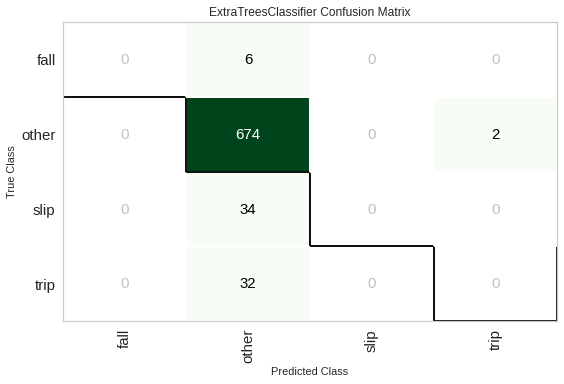

In [22]:
plot_model(et, plot = 'confusion_matrix')

In [18]:
tuned_et = tune_model(et, optimize = 'Prec.')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6629,0.0000,0.6548,0.8562,0.7270,0.2012,0.2558
1,0.6914,0.0000,0.5097,0.8217,0.7429,0.1209,0.1394
2,0.6343,0.7604,0.4942,0.8642,0.7045,0.1975,0.2663
3,0.6686,0.6585,0.4103,0.8305,0.7284,0.1384,0.1676
4,0.6629,0.6925,0.3619,0.8257,0.7258,0.1131,0.1350
5,0.6782,0.0000,0.5919,0.8386,0.7340,0.1751,0.2122
6,0.7299,0.0000,0.6462,0.8627,0.7771,0.2530,0.2953
7,0.7069,0.0000,0.5503,0.8770,0.7614,0.2770,0.3410
8,0.7241,0.0000,0.6156,0.8562,0.7729,0.2284,0.2655
9,0.6609,0.0000,0.5606,0.8298,0.7218,0.1428,0.1743


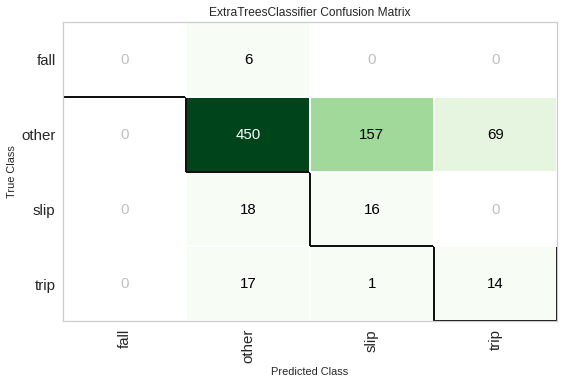

In [24]:
plot_model(tuned_et, plot = 'confusion_matrix')

In [17]:
print(tuned_et)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                     criterion='entropy', max_depth=5, max_features=1.0,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0002, min_impurity_split=None,
                     min_samples_leaf=5, min_samples_split=10,
                     min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)


In [19]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8743,0.0000,0.3914,0.8295,0.8432,0.1190,0.1437
1,0.8800,0.0000,0.3624,0.8450,0.8392,0.0661,0.1010
2,0.8857,0.5772,0.2762,0.8142,0.8411,0.0770,0.1386
3,0.8857,0.7247,0.3257,0.8743,0.8561,0.2000,0.2419
4,0.8629,0.5620,0.2435,0.7821,0.8205,-0.0289,-0.0397
5,0.8851,0.0000,0.3682,0.8132,0.8402,0.0769,0.1387
6,0.8736,0.0000,0.3639,0.8037,0.8355,0.0892,0.1141
7,0.8678,0.0000,0.3892,0.8280,0.8393,0.1083,0.1254
8,0.8851,0.0000,0.3957,0.8488,0.8496,0.1420,0.1953
9,0.8793,0.0000,0.3312,0.7827,0.8282,-0.0083,-0.0202


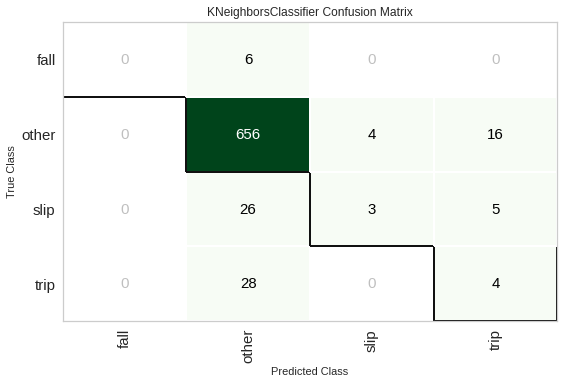

In [23]:
plot_model(knn, plot = 'confusion_matrix')

In [20]:
tuned_knn = tune_model(knn, optimize = 'Prec.')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8800,0.0000,0.3653,0.8653,0.8689,0.3188,0.3276
1,0.8857,0.0000,0.3435,0.8628,0.8659,0.2731,0.2983
2,0.8914,0.6240,0.3479,0.8619,0.8686,0.2871,0.3214
3,0.8800,0.7486,0.3475,0.8722,0.8597,0.2363,0.2584
4,0.8743,0.6262,0.3197,0.8356,0.8490,0.1744,0.1952
5,0.8678,0.0000,0.3899,0.8308,0.8411,0.1353,0.1517
6,0.8448,0.0000,0.3812,0.8150,0.8287,0.1224,0.1257
7,0.8563,0.0000,0.4784,0.8422,0.8487,0.2662,0.2675
8,0.8908,0.0000,0.4913,0.8617,0.8728,0.3472,0.3653
9,0.8621,0.0000,0.4494,0.8368,0.8479,0.2197,0.2257


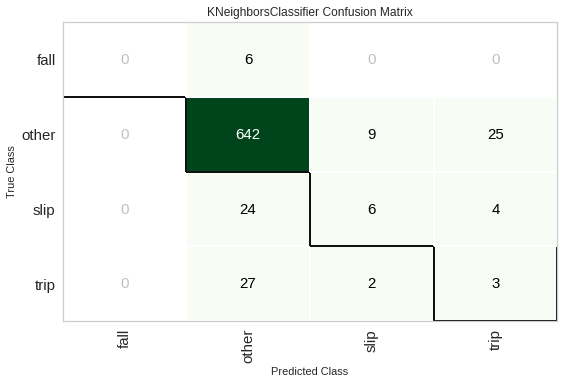

In [21]:
plot_model(tuned_knn, plot = 'confusion_matrix')